Monte Carlo integration
=======================

Imagine that we want to measure the area of a pond with arbitrary shape.
Suppose that this pond is in the middle of a field with known area $A$.
If we throw $N$ stones randomly, such that they land within the
boundaries of the field, and we count the number of stones that fall in
the pond $N_{in}$, the area of the pond will be approximately
proportional to the fraction of stones that make a splash, multiplied by
$A$: $$A_{pond}=\frac{N_{in}}{N}A.$$ This simple procedure is an example
of the “Monte Carlo” method.

Simple Monte Carlo integration
------------------------------

More generaly, imagine a rectangle of height $H$ in the integration
interval $[a,b]$, such that the function $f(x)$ is within its
boundaries. Compute $n$ pairs of random numbers $(x_i,y_i)$ such that
they are uniformly distributed inside this rectangle. The fraction of
points that fall within the area contained below $f(x)$, <span>*i.
e.*</span>, that satisfy $y_i \leq f(x_i)$ is an estimate of the ratio o
fthe integral of $f(x)$ and the area of the rectangle. Hence, the
estimate of the integral will be given by:
$$\int _a^b{f(x)dx} \simeq I(N) = \frac{N_{in}}{N}H(b-a).
$$

Another Monte Carlo procedure is based on the definition:
$$\langle g \rangle=\frac{1}{(b-a)} \int _a^b{f(x)dx}.
$$ In order to determine this average, we sample the
value of $f(x)$:
$$\langle f \rangle \simeq \frac{1}{N}\sum_{i=1}^{N}f(x_i),$$ where the
$N$ values $x_i$ are distributed unformly in the interval $[a,b]$. The
integral will be given by $$I(N)=(b-a) \langle f \rangle .$$
Monte Carlo error analysis
--------------------------

The Monte Carlo method clearly yields approximate results. The accuracy
deppends on the number of values $N$ that we use for the average. A
possible measure of the error is the “variance” $\sigma^2$ defined by:
$$\sigma ^2=\langle f^2 \rangle - \langle f \rangle ^2,
$$ where
$$\langle f \rangle = \frac{1}{N} \sum_{i=1}^N f(x_i)$$ and
$$\langle f^2 \rangle = \frac{1}{N} \sum_{i=1}^{N} f(x_i)^2.$$ The
“standard deviation” is $\sigma$. However, we should expect that the
error decreases with the number of points $N$, and the quantity $\sigma$
defines by (\[mc\_sigma\]) does not. Hence, this cannot be a good
measure of the error.

Imagine that we perform several measurements of the integral, each of
them yielding a result $I_n$. These values have been obtained with
different sequences of $N$ random numbers. According to the central
limit theorem, these values whould be normally dstributed around a mean
$\langle I
\rangle$. Suppouse that we have a set of $M$ of such measurements
${I_n}$. A convenient measure of the differences of these measurements
is the “standard deviation of the means” $\sigma_M$:
$$\sigma_M ^2=\langle I^2 \rangle - \langle I \rangle ^2,
$$ where
$$\langle I \rangle = \frac{1}{M} \sum_{n=1}^M I_n$$ and
$$\langle I^2 \rangle = \frac{1}{M} \sum_{n=1}^{M} I_n^2.$$ 
It can be proven that
$$\sigma_M \approx \sigma/\sqrt{N}.
$$ This relation becomes exact in the limit of a very
large number of measurements. Note that this expression implies that the
error decreases with the squere root of the number of trials, meaning
that if we want to reduce the error by a factor 10, we need 100 times
more points for the average.

### Exercise 10.1: One dimensional integration 

1.  Write a program that implements the “hit and miss” Monte Carlo
    integration algorithm. Find the estimate $I(N)$ for the integral of
    $$f(x)=4\sqrt{1-x^2}$$ as a function of $N$, in the interval
    $(0,1)$. Choose $H=1$, and sample only the $x$-dependent part
    $\sqrt{1-x^2}$, and multiply the result by 4. Calculate the
    difference between $I(N)$ and the exact result $\pi$. This
    difference is a measure of the error associated with the Monte
    Carlo estimate. Make a log-log plot of the error as a function of
    $N$. What is the approximate functional deppendece of the error on
    $N$ for large $N$?

2.  Estimate the integral of $f(x)$ using the simple Monte Carlo
    integration by averaging over $N$ points, using (\[mc\_integral2\]),
    and compute the error as a function of $N$, for $N$ upt to 10,000.
    Determine the approximate functional deppendence of the error on $N$
    for large $N$. How many trials are necessary to determine $I_N$ to
    two decimal places?

3.  Perform 10 measurements $I_n(N)$, with $N=10,000$ using different
    random sequences. Show in a table the values of $I_n$ and $\sigma$
    according to (\[mc\_integral2\]) and (\[mc\_sigma\]).
    Use (\[mc\_sigmam\]) to estimate the standard deviation of the
    means, and compare to the values obtained from (\[mc\_sigma2\])
    using the 100,000 values.

4.  To verify that your result for the error is independent of the
    number of sets you used to divide your data, repeat the previous
    item grouping your results in 20 groups of 5,000 points each.

### Exercise 10.2: Importance of randomness 

To examine the effects of a poor random number generator, modify your
program to use the linear congruential random number generator using the
perameters $a=5$, $c=0$ and the seed $x_1=1$. Repeat the integral of the
previous exercise and compare your results.

#### Challenge 10.1: 

Exercise 10.2




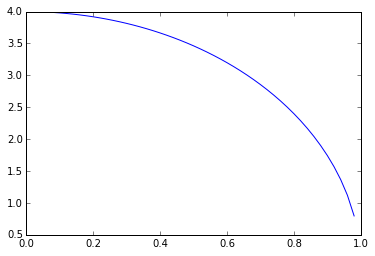

In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot

x = np.arange(0,1,0.02)
pyplot.plot(x, 4*np.sqrt(1-x**2))

(100, 77, 3.0800000000000001, 0.061592653589793045)
(200, 160, 3.2000000000000002, 0.058407346410207062)
(400, 325, 3.25, 0.10840734641020688)
(800, 632, 3.1600000000000001, 0.018407346410207026)
(1600, 1263, 3.1575000000000002, 0.015907346410207079)
(3200, 2498, 3.1225000000000001, 0.019092653589793063)
(6400, 5025, 3.140625, 0.000967653589793116)
(12800, 10051, 3.1409375000000002, 0.00065515358979295613)
(25600, 19999, 3.1248437500000001, 0.016748903589792974)
(51200, 40239, 3.1436718749999999, 0.0020792214102067774)
(102400, 80786, 3.1557031250000001, 0.014110471410206937)
(204800, 160801, 3.14064453125, 0.00094812233979313376)
(409600, 321363, 3.1383105468750001, 0.0032821067147930094)
(819200, 642931, 3.1393115234375002, 0.0022811301522929206)
(1638400, 1286836, 3.1416894531250001, 9.6799535207026111e-05)
(3276800, 2573423, 3.1413854980468749, 0.00020715554291816929)


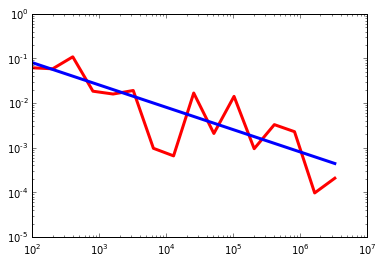

In [12]:

# Hit and miss Monte Carlo integration
ngroups = 16

I = np.zeros(ngroups)
N = np.zeros(ngroups)
E = np.zeros(ngroups)

n0 = 100
for i in range(ngroups):

    N[i] = n0
    x = np.random.random(n0)
    y = np.random.random(n0)
    I[i] = 0.
    Nin = 0
    for j in range(n0):
        if(y[j] < np.sqrt(1-x[j]**2)):
            Nin += 1
            
    I[i] = 4.*float(Nin)/float(n0)
    E[i] = abs(I[i]-np.pi)
    print (n0,Nin,I[i],E[i])
    n0 *= 2
    
            
pyplot.plot(N,E,ls='-',c='red',lw=3);
pyplot.plot(N,0.8/np.sqrt(N),ls='-',c='blue',lw=3);

pyplot.xscale('log')
pyplot.yscale('log')

100 3.17011718576 0.0285245321656
200 3.12867835052 0.0129143030745
400 3.1634254696 0.0218328160149
800 3.14861693166 0.00702427806806
1600 3.16292504227 0.0213323886757
3200 3.1387298773 0.00286277629378
6400 3.12536356964 0.0162290839519
12800 3.13916813336 0.00242452023093
25600 3.13676355848 0.00482909510588
51200 3.14303794505 0.00144529145852
102400 3.1324707758 0.00912187779058
204800 3.14206941609 0.000476762500761
409600 3.14183882865 0.000246175055787
819200 3.14291738648 0.0013247328939
1638400 3.14195247482 0.000359821226621
3276800 3.14120649727 0.000386156320964


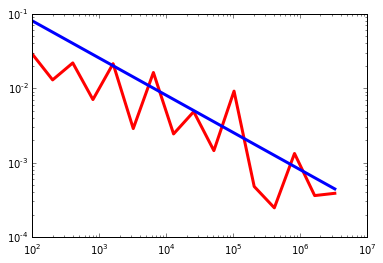

In [4]:
# Simple Monte Carlo Integration
ngroups = 16

I = np.zeros(ngroups)
N = np.zeros(ngroups)
E = np.zeros(ngroups)

n0 = 100
for i in range(ngroups):

    N[i] = n0
    r = np.random.random(n0)
    I[i] = 0.
    for j in range(n0):
        x = r[j]
        I[i] += np.sqrt(1-x**2)
        
    I[i] *= 4./float(n0)
    E[i] = abs(I[i]-np.pi)
    print n0,I[i],E[i]
    n0 *= 2
    
            
pyplot.plot(N,E,ls='-',c='red',lw=3);
pyplot.plot(N,0.8/np.sqrt(N),ls='-',c='blue',lw=3);
pyplot.xscale('log')
pyplot.yscale('log')

In [20]:
n0 = 100000
I = np.zeros(n0)
r = np.random.random(n0)
for j in range(n0):
    x = r[j]
    I[j] = 4*np.sqrt(1-x**2)

def group_measurements(ngroups):
    global I,n0
    
    nmeasurements = n0/ngroups
    for n in range(ngroups):
        Ig = 0.
        Ig2 = 0.
        for i in range(n*nmeasurements,(n+1)*nmeasurements):
            Ig += I[i]
            Ig2 += I[i]**2
        Ig /= nmeasurements
        Ig2 /= nmeasurements
        sigma = Ig2-Ig**2
        print(Ig,Ig2,sigma)
        
group_measurements(10)
print("=============================")
group_measurements(20)
print("=============================")
group_measurements(1)




(3.147846283159518, 10.680783230912089, 0.77184700851089794)
(3.1580539859950902, 10.74096971196481, 0.76766473350533282)
(3.1406281485021221, 10.66313102765778, 0.799585860493913)
(3.1496637884629224, 10.727421562291832, 0.80703958193722336)
(3.154676614353717, 10.729834170299018, 0.77784962914878797)
(3.1626783625898396, 10.771816773892448, 0.76928234869849987)
(3.1306623707073826, 10.606514743529543, 0.80546786416637417)
(3.1550582020979947, 10.744126447835619, 0.78973418920978844)
(3.1454252300924748, 10.68437393582718, 0.79067405772488186)
(3.1653709643980443, 10.781861925623135, 0.76228858336892991)
(3.1516793149469096, 10.704698225586647, 0.7716157213224264)
(3.1440132513721006, 10.656868236237541, 0.77204891143417242)
(3.1659818643366489, 10.786659666269417, 0.76321850096085342)
(3.1501261076535259, 10.695279757660135, 0.77198526353978103)
(3.1366617061089581, 10.646247096466221, 0.80760043789586078)
(3.1445945908952666, 10.680014958849368, 0.7915398177615991)
(3.14166598845323

Variance reduction
------------------

If the function being integrated does not fluctuate too much in the
interval of integration, and does not differ much from the average
value, then the standard Monte Carlo mean-value method should work well
with a reasonable number of points. Otherwise, we will find that the
variance is very large, meaning that some points will make small
contributions, while others will make large contributions to the
integral. If this is the case, the algorithm will be very inefficient.
The method can be improved by splitting the function $f(x)$ in two
$f(x)=f_1(x)+f_2(x)$, such that the integral of $f_1(x)$ is known, and
$f_2(x)$ as a small variance. The “variance reduction” technique,
consists then in evaluating the integral of $f_2(x)$ to obtain:
$$\int _a^b{f(x)dx}=\int _a^b {f_1(x)dx} + \int _a^b{f_2(x)dx} = \int
_a^b{f_1(x)dx}+J.$$

Importance Sampling
-------------------

Imagine that we want to sample the function $f(x)=e^{-x^2}$ in the
interval $[0,1]$. It is evident that most of our points will fall in the
region where the value of $f(x)$ is very small, and therefore we will
need a large number of values to achieve a decent accuracy. A way to
improve the measurement by reducing the variance is obtained by
“importance sampling”. As the name says, the idea is to sample the
regions with larger contributions to the integral. For this goal, we
introduce a probability distribution $P(x)$ normalized in the interval
of integration $$\int _a^b{P(x)dx} = 1.$$ Then, we can rewrite the
integral of $f(x)$ as $$I=\int _a^b{\frac{f(x)}{P(x)}P(x)dx}
$$ We can evaluate this integral, by sampling
according to the probability distribution $P(x)$ and evaluating the sum
$$I(N)=\frac{1}{N} \sum_{i=1}^N \frac{f(x_i)}{P(x_i)}.
$$ Note that for the uniform case $P(x)=1/(b-a)$, the
expression reduces to the simple Monte Carlo integral.

We are free to choose $P(x)$ now. We wish to do it in a way to reduce
and minimize the variance of the integrand $f(x)/P(x)$. The way to to
this is picking a $P(x)$ that mimics $f(x)$ where $f(x)$ is large. if we
are able to determine an apropiate $P(x)$, the integrand will be slowly
varying, and hence the variance will be reduced. Another consideration
is that the generation of points according to the distribution $P(x)$
should be a simple task. As an example, let us consider again the
integral $$I=\int _0^1 {e^{-x^2}dx}.$$ A reasonable choice for a weigh
function is $P(x)=Ae^{-x}$, where $A$ is a normalization constant.

Notice that for $P(x)=f(x)$ the variance is zero! This is known as the
zero variance property. There is a catch, though: The probability function
$P(x)$ needs to be normalized, implying that in reality, $P(x)=f(x)/\int f(x)dx$, which
assumes that we know in advance precisely the integral that we are trying to calculate!

### Exercise 10.3: Importance sampling 

1.  Choose the weight function $P(x)=e^{-x}$ and evaluate the integral:
    $$\int _0^{\infty} {x^{3/2}e^{-x}dx}.$$

2.  Choose $P(x)=e^{-ax}$ and estimate the integral
    $$\int _0^{\pi} \frac{dx}{x^2+\cos ^2{x}}.$$ Determine the value of
    $a$ that minimizes the variance of the integral.



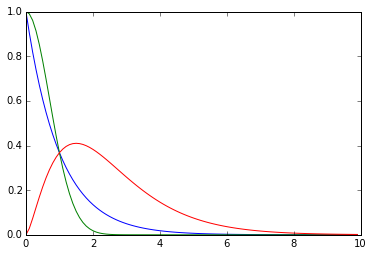

In [16]:
pyplot.xlim(0,10)
x = np.arange(0,10,0.1)
pyplot.plot(x,np.exp(-x));
pyplot.plot(x,np.exp(-x**2));
pyplot.plot(x,x**1.5*np.exp(-x));

('Trapezoids: ', 1.3293401896452883)
('Simple Monte Carlo: ', 0.20056324316453975)
('Importance Sampling: ', 1.3274812570687529)


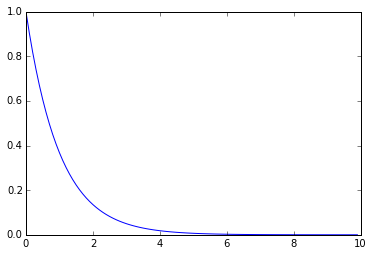

In [17]:
pyplot.plot(x,np.exp(-x));

# Trapezoidal integration
def trapezoids(func, xmin, xmax, nmax):
    Isim = func(xmin)+func(xmax)
    h = (xmax-xmin)/nmax
    for i in range(1,nmax):
        x = xmin+i*h
        Isim += 2*func(x)

    Isim *= h/2
    return Isim

def f(x):
    return x**1.5*np.exp(-x)
    
    
print("Trapezoids: ", trapezoids(f, 0., 20., 100000))

# Simple Monte Carlo integration
n0 = 1000000
r = np.random.random(n0)

Itot = np.sum(r**1.5*np.exp(-r))
print("Simple Monte Carlo: ", Itot/n0)

x = -np.log(r)
Itot = np.sum(x**1.5)
print("Importance Sampling: ", Itot/n0)

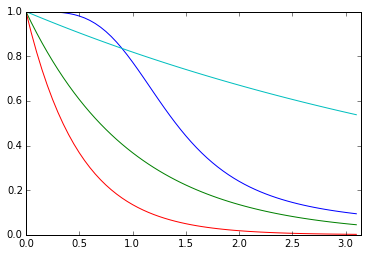

In [8]:
pyplot.xlim(0,np.pi)
x = np.arange(0,np.pi,0.05)
pyplot.plot(x,1./(x**2+np.cos(x)**2));
pyplot.plot(x,np.exp(-x));
pyplot.plot(x,np.exp(-2*x));
pyplot.plot(x,np.exp(-0.2*x));

('Trapezoids: ', 1.5811879708476726)
('Simple Monte Carlo: ', 1.5797827458870988)
Importance Sampling:
(0.10000000000000001, 1.5249932951532761, 0.0032106108008850783)
(0.20000000000000001, 1.500574956171425, 0.0020620353300057834)
(0.30000000000000004, 1.4909489814323917, 0.0015501151854219446)
(0.40000000000000002, 1.4972166132266675, 0.001253730258486196)
(0.5, 1.5150987897327253, 0.0010519673109991509)
(0.59999999999999998, 1.5396688576732183, 0.00089146164837288042)
(0.70000000000000007, 1.562729690720903, 0.00073295382565260678)
(0.80000000000000004, 1.5793639491254796, 0.0005398229504600167)
(0.90000000000000002, 1.5841754319568198, 0.00018115922009347653)
(1.0, 1.5731422269735431, 0.00049706591253183773)
(1.1000000000000001, 1.5442687571008678, 0.00073661399038752091)
(1.2000000000000002, 1.4979461586383445, 0.00091469121334639451)
(1.3000000000000003, 1.436708046979557, 0.0010518889261524923)
(1.4000000000000001, 1.3643041732000638, 0.0011530775897953722)
(1.5000000000000002, 

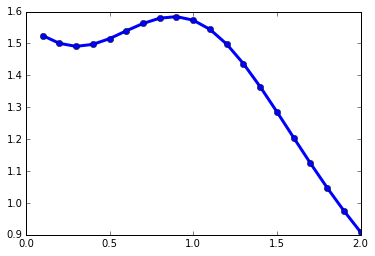

In [14]:
# Trapezoidal integration

def g(x):
    return 1./(x**2+np.cos(x)**2)

print("Trapezoids: ", trapezoids(g, 0., np.pi, 1000000))

# Simple Monte Carlo integration
n0 = 1000000
a = np.arange(0.1,2.1,0.1)
I = np.arange(0.1,2.1,0.1)

r = np.random.random(n0)

I0 = np.sum(1./((r*np.pi)**2+np.cos(r*np.pi)**2))
print("Simple Monte Carlo: ", I0/n0*np.pi)

# Importance Sampling
print("Importance Sampling:")
x = -np.log(r)
              
i = 0
for ai in a:
    norm = (1.-np.exp(-ai*np.pi))/ai
    x1 = norm*x/ai
    Itot = 0.
    Nin = 0
    I2 = 0.
    for xi in x1:
        if(xi <= np.pi):
            Nin += 1
            Itot += g(xi)*np.exp(xi*ai)
            I2 += (g(xi)*np.exp(xi*ai))**2

    Itot *= norm
    I2 *= norm

    I[i] = Itot/Nin
    i += 1
    print(ai,Itot/Nin,np.sqrt(abs(Itot**2/Nin**2-I2/Nin))/np.sqrt(Nin))
    
pyplot.plot(a,I,ls='-',marker='o',c='red',lw=3);


### Exercise 10.4: The Metropolis algorithm 

Use the Metropolis algorithm to sample points according to a ditribution
and estimate the integral $$\int _0^4 {x^2e^{-x}dx},$$ with
$P(x)=e^{-x}$ for $0 \leq x \leq 4$. Plot the number of times the
walker is at points $x_0$, $x_1$, $x_2$, ... Is the integrand sampled
uniformly? If not, what is the approximate region of $x$ where the
integrand is sampled more often?

('Trapezoids: ', 1.5237933888733828)
('Metropolis: ', 1.5251458730929552)


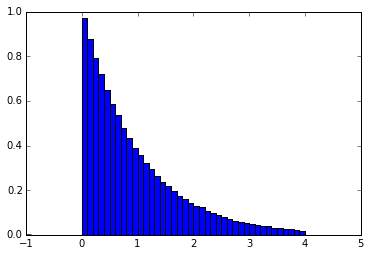

In [26]:
delta = 2
xmin = 0.
xmax = 4.

def f(x):
    return x**2*np.exp(-x)

def P(x):
    global xmin, xmax
    if(x < xmin or x > xmax):
        return 0.
    return np.exp(-x)


def metropolis(xold):
    global delta
    xtrial = np.random.random()    
    xtrial = xold+(2*xtrial-1)*delta
    weight = P(xtrial)/P(xold)
    xnew = xold
    if(weight >= 1): #Accept
        xnew = xtrial
    elif(weight != 0):
        r = np.random.random()
        if(r <= weight): #Accept
            xnew = xtrial
    return xnew


xwalker = (xmax+xmin)/2.
for i in range(100000):
    xwalker = metropolis(xwalker)

I0 = 0.
N = 300000

x = np.zeros(N)

x[0] = xwalker
for i in range(1,N):
    for j in range(20):
        xwalker = metropolis(xwalker)
    x[i] = xwalker
    I0 += x[i]**2

binwidth=0.1
pyplot.hist(x,bins=np.arange(xmin-1, xmax+1, 0.1),normed=True);

print("Trapezoids: ", trapezoids(f,xmin,xmax,100000))
print("Metropolis: ", I0*(1.-np.exp(-4.))/N)

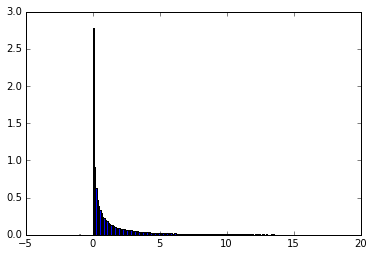

In [23]:
pyplot.hist(x**2,bins=np.arange(xmin**2-1, xmax**2+1, 0.1),normed=True);



#### Challenge 10.1

- Calculate the integral $\int_0^1 x^2 dx=1/3$ using simple MC integration and importance sampling with $P(x)=x$.

- Calculate the integral $\int_0^1 \sqrt{x}dx=2/3$ using simple MC integration and $P(x)=1-e^{-ax}$. Find the values of $a$ that minimizes the variance.